In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Load data

In [2]:
data = pd.read_csv("../data/last_dataset.csv")
# !ls -a

In [3]:
data.columns

Index(['Unnamed: 0', 'title', 'published', 'tags', 'comments', 'likes',
       'dislikes', 'favourites', 'views', 'guest_name', 'quote', 'tokens',
       '2_gram', '3_gram', 'page_name', 'wiki2016', 'wiki2017', 'wiki2018',
       'wiki2016_sr', 'wiki2017_sr', 'wiki2018_sr', 'gender', 'year', 'month',
       'month_from_start', 'week_day', 'Music', 'Politics', 'Sport',
       'Performer', 'Scientist', 'Critic', 'Writer', 'Journalist',
       'Photographer', 'Police/Military', 'Artist', 'Profession'],
      dtype='object')

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = data.select_dtypes(include=numerics)
num_df.columns
num_df = num_df.drop(['Unnamed: 0','Music','favourites', 'gender',
       'Politics', 'Sport', 'Performer', 'Scientist', 'Critic', 'Writer',
       'Journalist', 'Photographer', 'Police/Military', 'Artist'], axis=1)

In [5]:
num_df.head()

,comments,likes,dislikes,views,wiki2016,wiki2017,wiki2018,wiki2016_sr,wiki2017_sr,wiki2018_sr,year,month,month_from_start
0,194,527,24,13933,-1,-1,-1,-1,-1,-1,2018,3,34
1,271,658,105,38904,20442,21598,5923,-1,-1,-1,2018,3,34
2,208,680,39,40196,-1,-1,-1,-1,-1,-1,2018,3,34
3,307,660,69,32843,-1,-1,-1,-1,-1,-1,2018,3,34
4,334,765,395,51061,12898,9081,2904,-1,-1,-1,2018,3,34


In [6]:
def plot_correlation_map( df, lst, annot=True):
    if lst != []:
        df = df[df["wiki2016"] != -1] 
        df = df[df["wiki2017"] != -1]
        df = df[df["wiki2018"] != -1]
        df = df[df["wiki2016_sr"] != -1]
        df = df[df["wiki2017_sr"] != -1]
        df = df[df["wiki2018_sr"] != -1]
        df = df[lst]
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = annot, 
        annot_kws = { 'fontsize' : 12 }
    )
    plt.savefig("../figures/correlation_map")

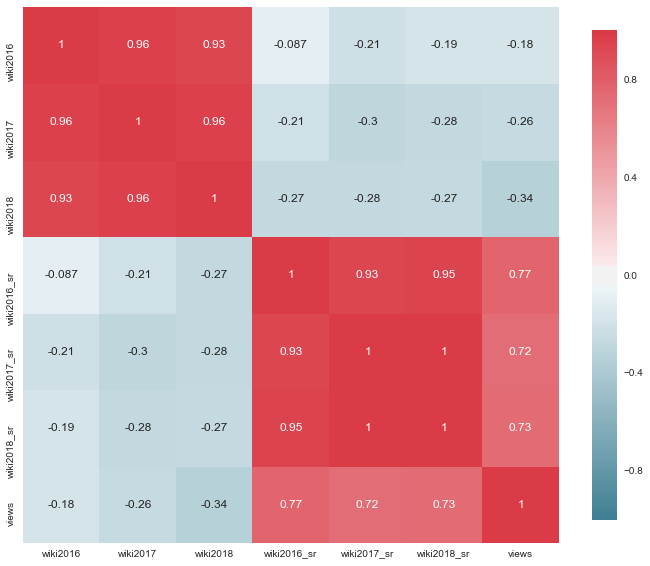

In [31]:
lst = ["wiki2016", "wiki2017","wiki2018","wiki2016_sr", "wiki2017_sr", "wiki2018_sr", "views"]
# data[["wiki2016_rs", "wiki2017_rs", "wiki2018_rs"]]
# data[lst]
plot_correlation_map(num_df, lst)

In [47]:
def cor_plot(x,y,data, path, remove_non=True):
    if remove_non == True:
        data = data[data[x] != -1]
    sns.regplot(x, y, data=data)
    plt.title("Colleration between YouTube and SR_Wikipedia Views")
    plt.savefig(path)

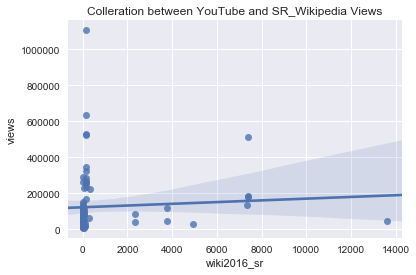

In [48]:
cor_plot('wiki2016_sr', "views",num_df, "../figures/wiki16_sr_ytviews")

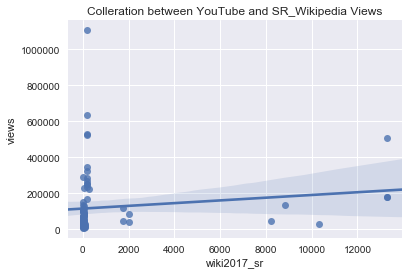

In [49]:
cor_plot('wiki2017_sr', "views",num_df, "../figures/wiki17_sr_ytviews")

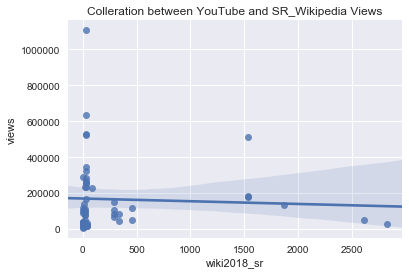

In [50]:
cor_plot('wiki2018_sr', "views",num_df, "../figures/wiki18_sr_ytviews")

In [ ]:
# data[data["wiki2018_sr"] != -1]

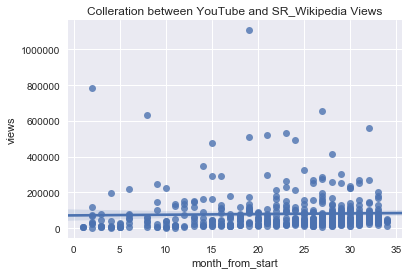

In [54]:
cor_plot('month_from_start', "views",num_df, "../figures/test")